# Tarea 02

#### Elaborado por Alexandra Salazar Ureña

In [43]:
# Carga de librerías pandas, geopandas y plotly.graph_objects

import pandas as pd
import pandas as gpd
import plotly.graph_objects as go

# Carga de plotly express
import plotly.express as px

# Carga de plotly figure factory,
# para tipos adicionales de gráficos
import plotly.figure_factory as ff

# Carga de módulos de matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Carga de pandas
import pandas as pd

# Obtener versión de geopandas
gpd.__version__

import numpy as np

In [2]:
# Carga de datos generales
covid_general = pd.read_csv("05_30_22_CSV_GENERAL.csv", sep=";")

In [3]:
# Estructura del conjunto de datos
covid_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Columns: 144 entries, FECHA to ARS_SIQ_UCI
dtypes: float64(118), int64(11), object(15)
memory usage: 918.1+ KB


In [4]:
# Datos generales
covid_general

,FECHA,SE,positivos,nue_posi,conf_lab,conf_nexo,muj_posi,hom_posi,extranj_posi,costar_posi,...,CEACOINS_UCI,CEACOINS_SALON,PAUT_UCI,PAUT_SALON,HVITO_UCI,HVITO_SALON,UNICAR_SAL,UNICAR_UCI,ARS-SIQ_SAL,ARS_SIQ_UCI
0,06/03/2020,10,2,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/03/2020,10,7,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08/03/2020,11,10,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09/03/2020,11,12,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/03/2020,11,13,1,NaN,NaN,7.0,6.0,3.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,26/05/2022,21,896712,3499,3272.0,227.0,460886.0,435826.0,102478.0,794234.0,...,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0
812,27/05/2022,21,899404,2692,2491.0,201.0,462372.0,437032.0,102727.0,796677.0,...,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
813,28/05/2022,21,901542,2138,1907.0,231.0,463595.0,437947.0,103010.0,798532.0,...,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
814,29/05/2022,22,903213,1671,1603.0,68.0,464547.0,438666.0,103241.0,799972.0,...,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0


In [5]:
# Reducción de columnas
covid_general = covid_general[["FECHA", "hom_posi", "muj_posi", "menor_posi", "adul_posi", 
                               "am_posi", "nue_posi"]]

# Cambio de nombre de las columnas a minúsculas y a nombres más claros
covid_general = covid_general.rename(columns={"FECHA": "fecha",
                                              "hom_posi": "hombres_positivos",
                                              "muj_posi": "mujeres_positivos",
                                              "menor_posi": "menores_positivos",
                                              "adul_posi": "adultos_positivos",
                                              "am_posi": "adultos_mayores_positivos",
                                              "nue_posi": "nuevos_positivos"})

# Cambio del tipo de datos del campo de fecha
covid_general["fecha"] = pd.to_datetime(covid_general["fecha"], format="%d/%m/%Y")

### Tabla datos diarios de COVID 

In [6]:
covid_general

,fecha,hombres_positivos,mujeres_positivos,menores_positivos,adultos_positivos,adultos_mayores_positivos,nuevos_positivos
0,2020-03-06,NaN,NaN,NaN,NaN,NaN,2
1,2020-03-07,NaN,NaN,NaN,NaN,NaN,5
2,2020-03-08,NaN,NaN,NaN,NaN,NaN,3
3,2020-03-09,NaN,NaN,NaN,NaN,NaN,2
4,2020-03-10,6.0,7.0,2.0,9.0,2.0,1
...,...,...,...,...,...,...,...
811,2022-05-26,435826.0,460886.0,109907.0,730105.0,56583.0,3499
812,2022-05-27,437032.0,462372.0,110354.0,732142.0,56790.0,2692
813,2022-05-28,437947.0,463595.0,110680.0,733758.0,56986.0,2138
814,2022-05-29,438666.0,464547.0,110966.0,735005.0,57124.0,1671


In [7]:
# Reducción de columnas
covid_general_nuevos_positivos = covid_general[["fecha", "nuevos_positivos"]]
covid_general_nuevos_positivos

,fecha,nuevos_positivos
0,2020-03-06,2
1,2020-03-07,5
2,2020-03-08,3
3,2020-03-09,2
4,2020-03-10,1
...,...,...
811,2022-05-26,3499
812,2022-05-27,2692
813,2022-05-28,2138
814,2022-05-29,1671


### Gráfico de barras

In [34]:
px.bar(covid_general_nuevos_positivos, 
       y="nuevos_positivos",
       x = "fecha",
       orientation="v",
       title="Cantidad de casos positivos nuevos por día desde el 2020-06-03 hasta el 2022-05-30.")

([<matplotlib.axis.XTick at 0x1de8bbdad90>,
 [Text(0, 0, '2020-03-06 00:00:00'),
  Text(100, 0, '2020-06-14 00:00:00'),
  Text(200, 0, '2020-09-22 00:00:00'),
  Text(300, 0, '2020-12-31 00:00:00'),
  Text(400, 0, '2021-04-10 00:00:00'),
  Text(500, 0, '2021-07-19 00:00:00'),
  Text(600, 0, '2021-10-27 00:00:00'),
  Text(700, 0, '2022-02-04 00:00:00'),
  Text(800, 0, '2022-05-15 00:00:00')])

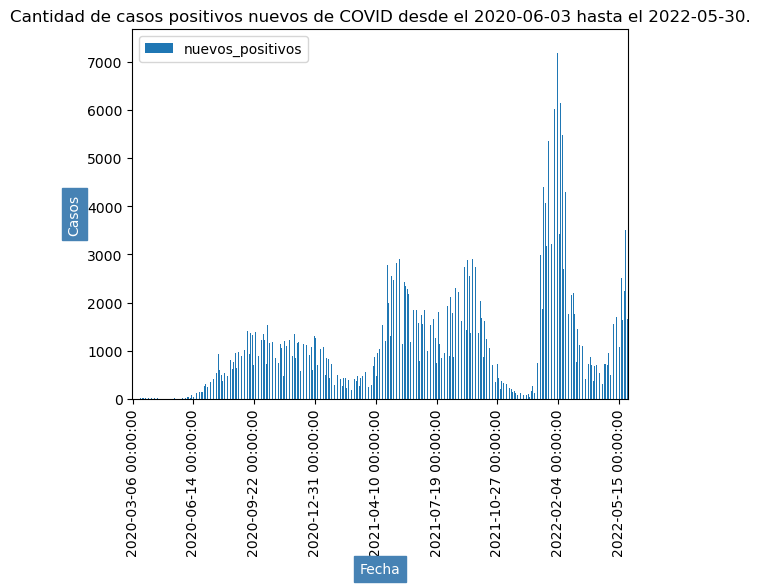

In [45]:
g_barras = covid_general_nuevos_positivos.plot.bar(x="fecha", y="nuevos_positivos")
                    

plt.title("Cantidad de casos positivos nuevos de COVID desde el 2020-06-03 hasta el 2022-05-30.")
plt.xlabel("Fecha",
          fontsize = 10,
          color = "w",
          fontstretch = 0,
          backgroundcolor = "SteelBlue")
plt.ylabel("Casos",
          fontsize = 10,
          color = "w",
          fontstretch = 0,
          backgroundcolor = "SteelBlue")
plt.xticks(np.arange(0, 817, step=100), )